In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from copy import deepcopy

from build_solver import build_erg_time_opt_solver, build_solver
import pickle as pkl

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


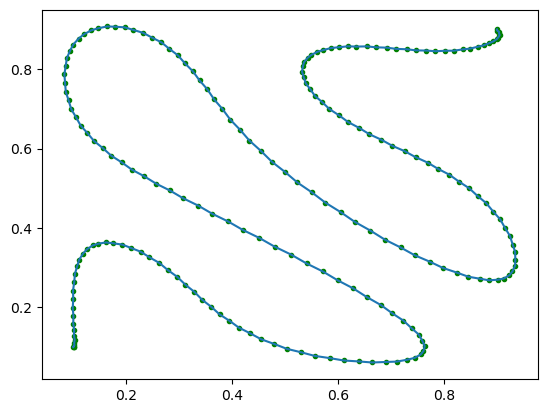

In [2]:

log = {
    'time' : [],
    'erg_ub' : [],
    'sols' : []
}

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    # 'erg_ub' : 0.2,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

solver, loss = build_solver(init_sol, args, dt=0.1)

# for i, erg_ub in enumerate(erg_ubs):
#     args.update({
#         'erg_ub' : erg_ub,
#         # 'alpha' : 0.8,
#     })
# solver.reset()
# solver = build_erg_time_opt_solver(init_sol, args)
solver.solve(args=args, max_iter=10000, eps=1e-8)
benchmark_sol = solver.get_solution()
# init_sol = deepcopy(sol)
# log['time'].append(np.array(sol['tf']))
# log['erg_ub'].append(erg_ub)
# log['sols'].append(sol)
# print(sol['tf'], erg_ub)
    # plt.figure(i)
plt.plot(benchmark_sol['x'][:,0], benchmark_sol['x'][:,1],'g.')
plt.plot(benchmark_sol['x'][:,0], benchmark_sol['x'][:,1])


# plt.show()

In [3]:
loss(benchmark_sol, args)

Array(0.00703917, dtype=float32)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


done in  5220  iterations
5.007921 0.1
5.015943 0.08
5.73927 0.05
6.969608 0.02
8.449434 0.01
10.482965 0.005


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

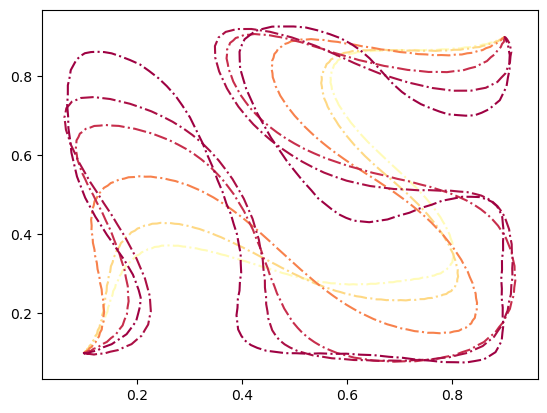

In [2]:
# erg_ubs = [0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.12, 0.15, 0.2]
erg_ubs = [0.005, 0.01, 0.02,0.05, 0.08, 0.1]

# erg_ubs = np.linspace(0.001, 0.2, num=20)
erg_ubs = erg_ubs[::-1]
log = {
    'time' : [],
    'erg_ub' : [],
    'sols' : []
}

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.2,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

solver = build_erg_time_opt_solver(init_sol, args)

cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=erg_ubs[-1], vmax=erg_ubs[0]+0.1)
for i, erg_ub in enumerate(erg_ubs):
    args.update({
        'erg_ub' : erg_ub,
        # 'alpha' : 0.8,
    })
    # solver.reset()
    # solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=10000, eps=1e-8)
    sol = solver.get_solution()
    init_sol = deepcopy(sol)
    log['time'].append(np.array(sol['tf']))
    log['erg_ub'].append(erg_ub)
    log['sols'].append(sol)
    print(sol['tf'], erg_ub)
    # plt.figure(i)
    rgba = cmap(norm(erg_ub))

    # plt.scatter(sol['x'][:,0], sol['x'][:,1],  color=rgba)
    plt.plot(sol['x'][:,0], sol['x'][:,1], '-.', color=rgba)
    
# plt.colorbar()
# plt.show()

5.007921
5.015943
5.73927
6.969608
8.449434
10.482965


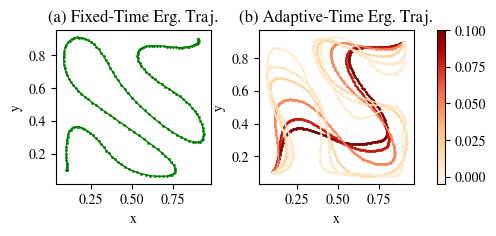

In [7]:
plt.rcParams["font.family"] = "freeserif"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6.0, 2))

cmap = matplotlib.cm.get_cmap('OrRd')
norm = matplotlib.colors.Normalize(vmin=erg_ubs[-1]-0.01, vmax=erg_ubs[0])
for erg_ub, sol in zip(erg_ubs, log['sols']):
    print(sol['tf'])
    rgba = cmap(norm(erg_ub))
    ax[1].plot(sol['x'][:,0], sol['x'][:,1], linewidth='1', color=rgba)
    ax[1].scatter(sol['x'][:,0], sol['x'][:,1], s=1,color=rgba)

ax[1].set_aspect('equal', adjustable='box')
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('(b) Adaptive-Time Erg. Traj.')

ax[0].plot(benchmark_sol['x'][:,0], benchmark_sol['x'][:,1], linewidth='1', color='g')
ax[0].scatter(benchmark_sol['x'][:,0], benchmark_sol['x'][:,1], s=1,color='g')
ax[0].set_aspect('equal', adjustable='box')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('(a) Fixed-Time Erg. Traj.')
# cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 norm=norm,
#                                 orientation='horizontal')
# cb1.set_label('Some Units')
# plt.tight_layout()
plt.savefig('fixed_erg_comparison.svg')

In [6]:
for erg_ub, sol in zip(erg_ubs, log['sols']):
    print(sol['tf'], np.max(np.linalg.norm(sol['u'],axis=1)))
    

5.007921 1.4129729
5.015943 1.413621
5.73927 1.3969742
6.969608 1.4142135
8.449434 1.413471
10.482965 1.4149771


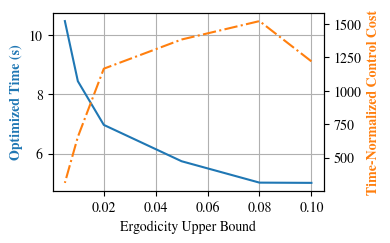

In [30]:
plt.rcParams["font.family"] = "freeserif"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax1 = plt.subplots(figsize=(4,2.5))


ax1.plot(log['erg_ub'], log['time'], color=colors[0])
# plt.plot(log['time'], ctrl_sat)
ax1.set_xlabel('Ergodicity Upper Bound', fontname='freeserif')
ax1.set_ylabel('Optimized Time (s)', color=colors[0], fontname='freeserif', weight='bold')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(log['erg_ub'], ctrl_sat, color=colors[1], linestyle='-.')
ax2.set_ylabel('Time-Normalized Control Cost', color=colors[1], fontname='freeserif', weight='bold')
plt.tight_layout()
plt.savefig('opt-results.svg')
# plt.show()

### Control Knot Point dependency

unsuccessful, tol:  0.0013332367
5.058998 50
done in  6010  iterations
4.9309573 100
done in  4728  iterations
5.557756 200
unsuccessful, tol:  0.027668
5.3259907 300
done in  3935  iterations
6.242244 400
unsuccessful, tol:  0.046283722
5.4803443 500
done in  6193  iterations
5.556984 600


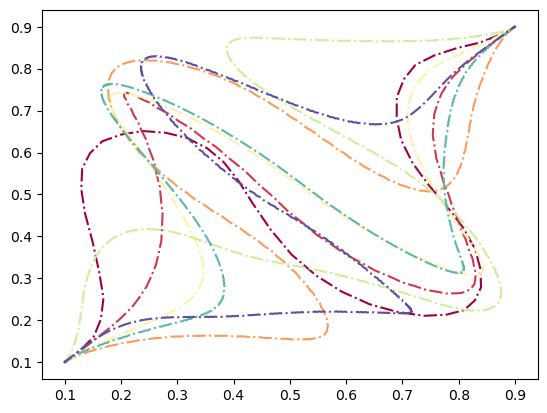

In [41]:
N_list = [50, 100, 200, 300, 400, 500, 600]


log = {
    'time' : [],
    'erg_ub' : [],
    'sols' : []
}

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.05,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(6.0)}

cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=N_list[0], vmax=N_list[-1])

for i, N in enumerate(N_list):
    args.update({
        'N' : N,
        # 'alpha' : 0.8,
    })
    
    x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
    u = np.zeros((args['N'], 2))
    init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

    solver = build_erg_time_opt_solver(init_sol, args)

    # solver.reset()
    # solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=10000, eps=1e-7)
    sol = solver.get_solution()
    init_sol = deepcopy(sol)
    log['time'].append(np.array(sol['tf']))
    # log['erg_ub'].append(erg_ub)
    log['sols'].append(sol)
    print(sol['tf'], N)
    # plt.figure(i)
    rgba = cmap(norm(N))

    # plt.scatter(sol['x'][:,0], sol['x'][:,1],  color=rgba)
    plt.plot(sol['x'][:,0], sol['x'][:,1], '-.', color=rgba)
    
# plt.colorbar()
# plt.show()

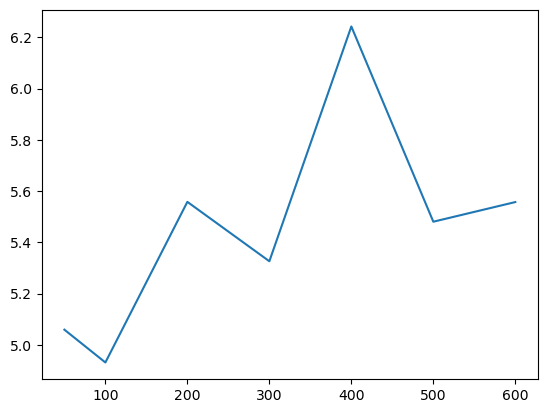

In [42]:
tf_sols = [_sol['tf'] for _sol in log['sols']]
plt.plot(N_list, tf_sols)

In [43]:
np.mean(tf_sols), np.std(tf_sols)

(5.4504676, 0.39447838)

### Need to find table for initial condition dependency

unsuccessful, tol:  0.014213562
5.2344503 4.0
unsuccessful, tol:  0.01622963
5.1097794 5.0
done in  4157  iterations
4.9140577 6.0
unsuccessful, tol:  0.014886856
4.632121 7.0


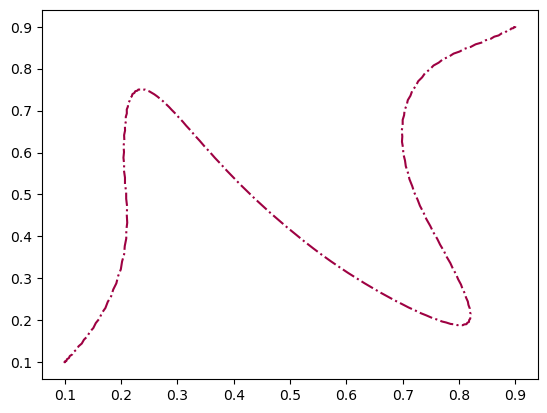

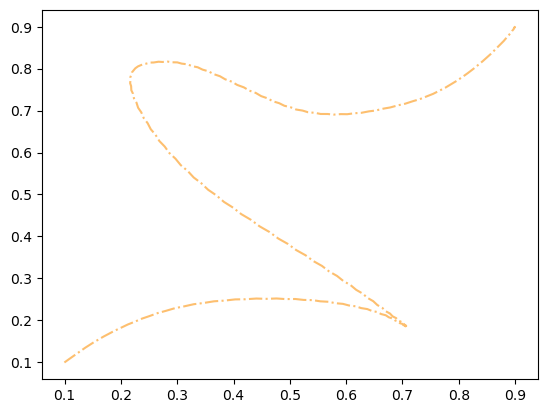

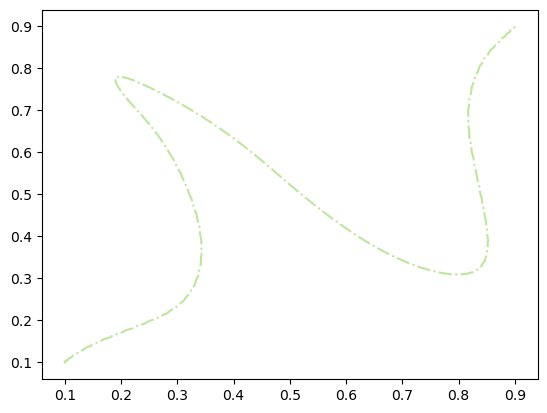

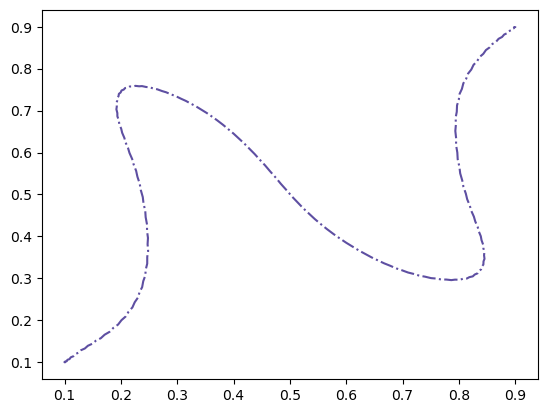

In [35]:
tf_list = np.arange(4, 8, step=1.0)


log = {
    'time' : [],
    'erg_ub' : [],
    'sols' : []
}

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.05,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=tf_list[0], vmax=tf_list[-1])

for i, init_tf in enumerate(tf_list):


    init_sol = {'x': x, 'u' : u, 'tf': np.array(init_tf)}

    solver = build_erg_time_opt_solver(init_sol, args, step_size=1e-3, c=1.0)

    # solver.reset()
    # solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=10000, eps=1e-8, alpha=1.001)
    sol = solver.get_solution()
    init_sol = deepcopy(sol)
    log['time'].append(np.array(sol['tf']))
    # log['erg_ub'].append(erg_ub)
    log['sols'].append(sol)
    print(sol['tf'], init_tf)
    # plt.figure(i)
    rgba = cmap(norm(init_tf))
    plt.figure(i)
    # plt.scatter(sol['x'][:,0], sol['x'][:,1],  color=rgba)
    plt.plot(sol['x'][:,0], sol['x'][:,1], '-.', color=rgba)
    
# plt.colorbar()
# plt.show()

In [37]:
opt_tf = []
for init_tf, _sol in zip(tf_list, log['sols']):
    opt_tf.append(_sol['tf'])


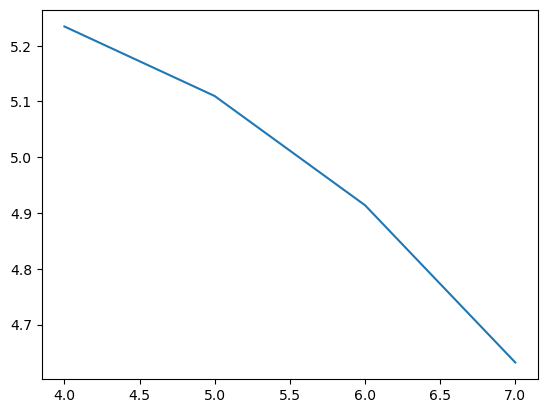

In [38]:
plt.plot(tf_list, np.stack(opt_tf))

In [39]:
np.mean(opt_tf)

4.972602

In [40]:
np.std(opt_tf)

0.22734162